<a href="https://colab.research.google.com/github/aparnaashok2125/Elevvo-Pathways-NLP-Internship/blob/main/Elevvo_Pathways_Task_2_News_Category_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of News Articles

It is a notebook for multiclass classification of News articles which are having classes numbered 1 to 4, where 1 is "World News", 2 is "Sports News", 3 is "Business News" and 4 is "Science-Technology News".

I have used various models for classification of the News articles. The classification algorithms used are:-

1. Multinomial Naive Bayes
2. Decision Tree
3. Gaussian Naive Bayes
4. Stochastic Gradient Descent Classifier
5. LGBM (light gradient boosting machine) Classifier


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder

In [2]:
# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [3]:
# Force redownload of all NLTK tokenizer and lemmatizer resources
nltk.download('punkt', download_dir='/usr/local/nltk_data')
nltk.download('punkt_tab', download_dir='/usr/local/nltk_data')  # If needed (rarely required separately)
nltk.download('stopwords', download_dir='/usr/local/nltk_data')
nltk.download('wordnet', download_dir='/usr/local/nltk_data')
nltk.download('omw-1.4', download_dir='/usr/local/nltk_data')

# Set NLTK data path explicitly if needed
nltk.data.path.append('/usr/local/nltk_data')

[nltk_data] Downloading package punkt to /usr/local/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /usr/local/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /usr/local/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /usr/local/nltk_data...
[nltk_data] Downloading package omw-1.4 to /usr/local/nltk_data...


In [5]:
# Load AG News dataset
train_data=pd.read_csv("/content/train.csv",header=0,names=['classid','title','desc'])
test_data=pd.read_csv("/content/test.csv",header=0,names=['classid','title','desc'])

In [ ]:
train_data.head()

,classid,title,desc
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [ ]:
test_data.head()

,classid,title,desc
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [6]:
# Map classid to category names
class_map = {1: 'World', 2: 'Sports', 3: 'Business', 4: 'Sci/Tech'}
train_data['category'] = train_data['classid'].map(class_map)
test_data['category'] = test_data['classid'].map(class_map)

In [7]:
# Combine title and description for better context
train_data['text'] = train_data['title'] + ' ' + train_data['desc']
test_data['text'] = test_data['title'] + ' ' + test_data['desc']

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocessor_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

train_data['clean_text'] = train_data['text'].apply(preprocessor_text)
test_data['clean_text'] = test_data['text'].apply(preprocessor_text)


In [9]:
# Prepare data for training
X_train = train_data['clean_text'][:10000]  # Limit for faster execution; adjust as needed
y_train = train_data['category'][:10000]
X_test = test_data['clean_text']
y_test = test_data['category']

In [10]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), min_df=3)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [11]:
# Train and evaluate classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Linear SVM': LinearSVC(max_iter=1000, random_state=42),
    'LGBM': LGBMClassifier(random_state=42)
}

In [12]:
print("Classifier Performance:")
for name, clf in classifiers.items():
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Classifier Performance:
Logistic Regression Accuracy: 0.8624
Logistic Regression Classification Report:
              precision    recall  f1-score   support

    Business       0.85      0.78      0.81      1900
    Sci/Tech       0.79      0.88      0.83      1900
      Sports       0.95      0.91      0.93      1900
       World       0.88      0.88      0.88      1900

    accuracy                           0.86      7600
   macro avg       0.87      0.86      0.86      7600
weighted avg       0.87      0.86      0.86      7600

--------------------------------------------------
Random Forest Accuracy: 0.8099
Random Forest Classification Report:
              precision    recall  f1-score   support

    Business       0.82      0.74      0.78      1900
    Sci/Tech       0.72      0.82      0.76      1900
      Sports       0.87      0.86      0.87      1900
       World       0.85      0.82      0.83      1900

    accuracy                           0.81      7600
   macro avg    

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LGBM Accuracy: 0.8326
LGBM Classification Report:
              precision    recall  f1-score   support

    Business       0.81      0.77      0.79      1900
    Sci/Tech       0.78      0.84      0.81      1900
      Sports       0.92      0.87      0.89      1900
       World       0.83      0.85      0.84      1900

    accuracy                           0.83      7600
   macro avg       0.83      0.83      0.83      7600
weighted avg       0.83      0.83      0.83      7600

--------------------------------------------------


## WordCloud of News Articles of Different Types

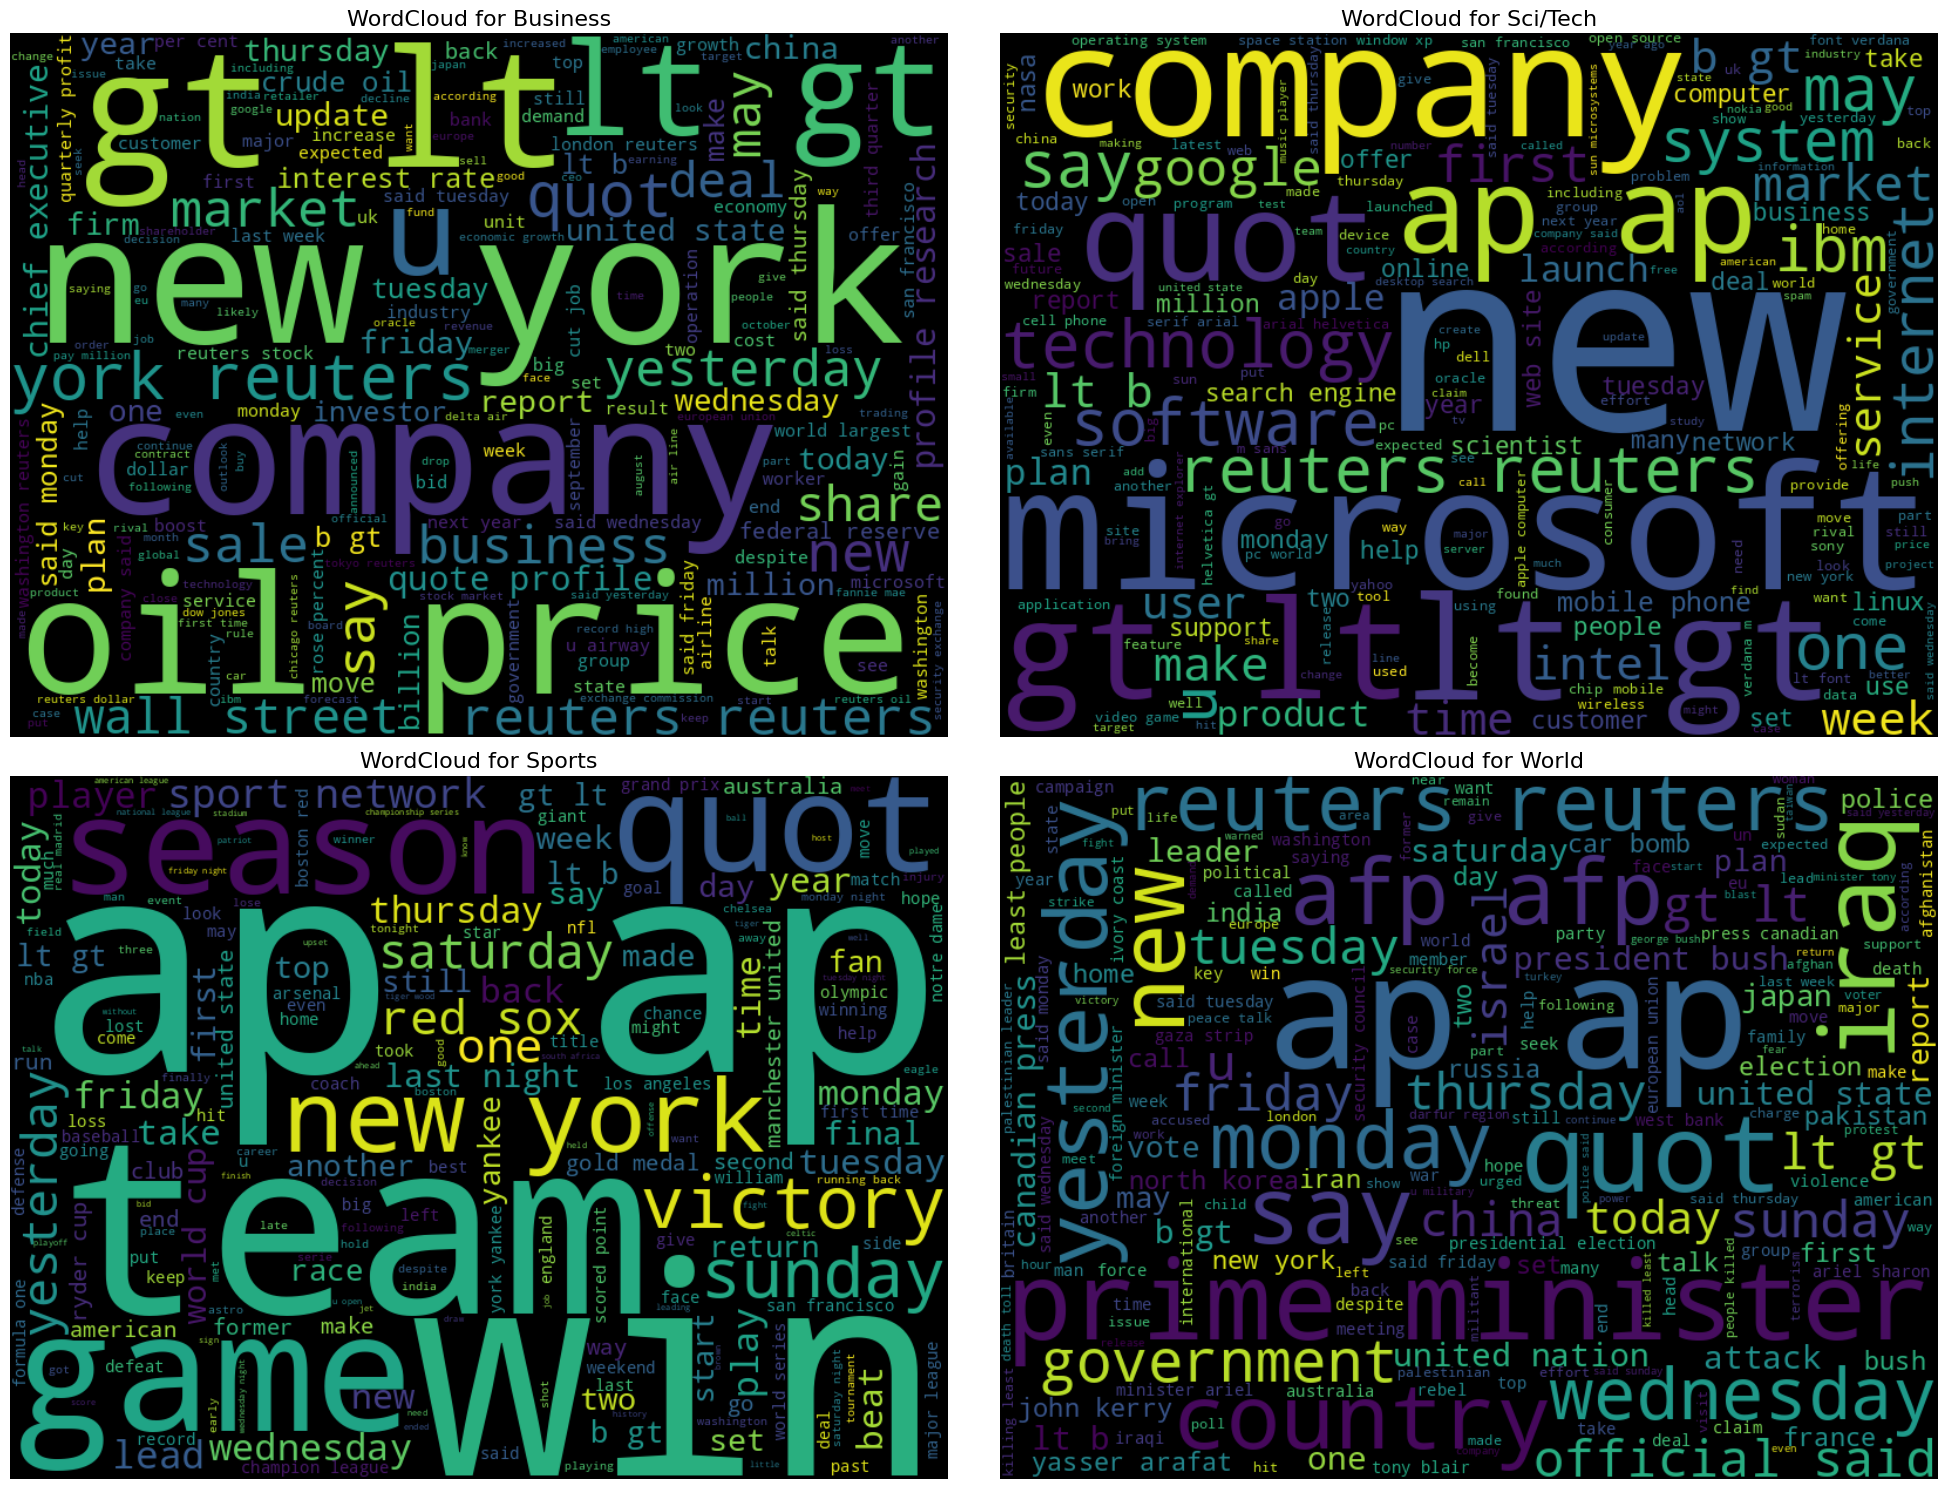

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Loop through each unique category
categories = train_data['category'].unique()

plt.figure(figsize=(20, 15))

for i, category in enumerate(categories):
    # Combine all text from this category
    text = " ".join(train_data[train_data['category'] == category]['clean_text'])

    # Generate word cloud
    wordcloud = WordCloud(
        background_color='black',
        max_words=200,
        width=800,
        height=600,
        colormap='viridis'  # You can try 'plasma', 'tab10', 'Set2', etc.
    ).generate(text)

    # Plotting
    plt.subplot(2, 2, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {category}', fontsize=16)

plt.tight_layout()
plt.show()


/tmp/ipython-input-15-419169485.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette=colors)
/tmp/ipython-input-15-419169485.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette=colors)
/tmp/ipython-input-15-419169485.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette=colors)
/tmp/ipython-input-15-419169485.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

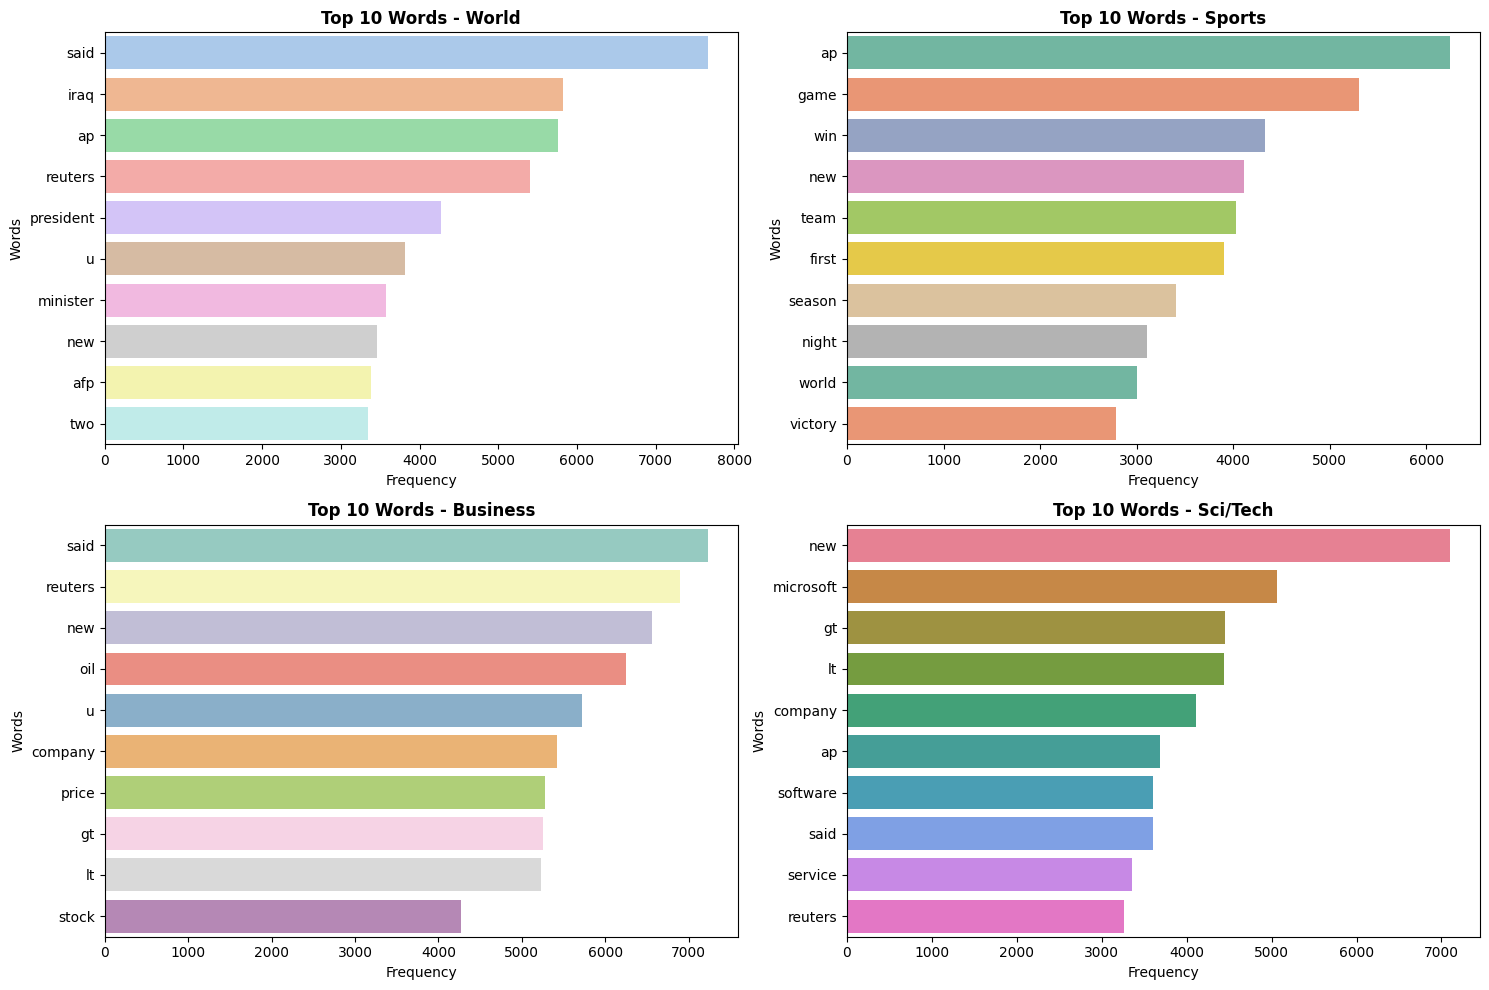

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set the overall figure size
plt.figure(figsize=(15, 10))

# Use a soft, visually attractive color palette
color_palettes = ['pastel', 'Set2', 'Set3', 'husl']  # You can add more if needed

# Generate bar plots for top 10 words per category
for i, category in enumerate(class_map.values()):
    category_texts = ' '.join(train_data[train_data['category'] == category]['clean_text']).split()
    word_counts = Counter(category_texts)
    top_words = word_counts.most_common(10)
    words, counts = zip(*top_words)

    # Cycle through the chosen color palettes
    palette_choice = color_palettes[i % len(color_palettes)]
    colors = sns.color_palette(palette_choice, len(words))

    # Plotting each subplot
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=list(counts), y=list(words), palette=colors)

    # Set titles and labels
    plt.title(f'Top 10 Words - {category}', fontsize=12, weight='bold')
    plt.xlabel('Frequency', fontsize=10)
    plt.ylabel('Words', fontsize=10)

# Final layout and display
plt.tight_layout()
plt.show()


In [16]:
# Bonus: Train a simple feedforward neural network with Keras
# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [17]:
# Convert TF-IDF to dense for Keras
X_train_dense = X_train_tfidf.toarray()
X_test_dense = X_test_tfidf.toarray()

In [18]:
# Build model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_dense.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 categories
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Train model
history = model.fit(
    X_train_dense, y_train_encoded,
    epochs=10, batch_size=128, validation_split=0.2, verbose=1
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.5108 - loss: 1.1905 - val_accuracy: 0.8765 - val_loss: 0.3777
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9219 - loss: 0.2436 - val_accuracy: 0.8895 - val_loss: 0.3509
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9652 - loss: 0.1171 - val_accuracy: 0.8785 - val_loss: 0.3836
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9806 - loss: 0.0701 - val_accuracy: 0.8735 - val_loss: 0.4464
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9832 - loss: 0.0490 - val_accuracy: 0.8745 - val_loss: 0.4776
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9918 - loss: 0.0285 - val_accuracy: 0.8750 - val_loss: 0.5207
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9911 - loss: 0.0295 - val_accuracy: 0.8705 - val_loss: 0.5462
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9913 - loss: 0.0274 - val_accuracy: 0.8685 - val_loss

In [20]:
# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test_dense, y_test_encoded, verbose=0)
print(f"\nNeural Network Test Accuracy: {test_accuracy:.4f}")


Neural Network Test Accuracy: 0.8332


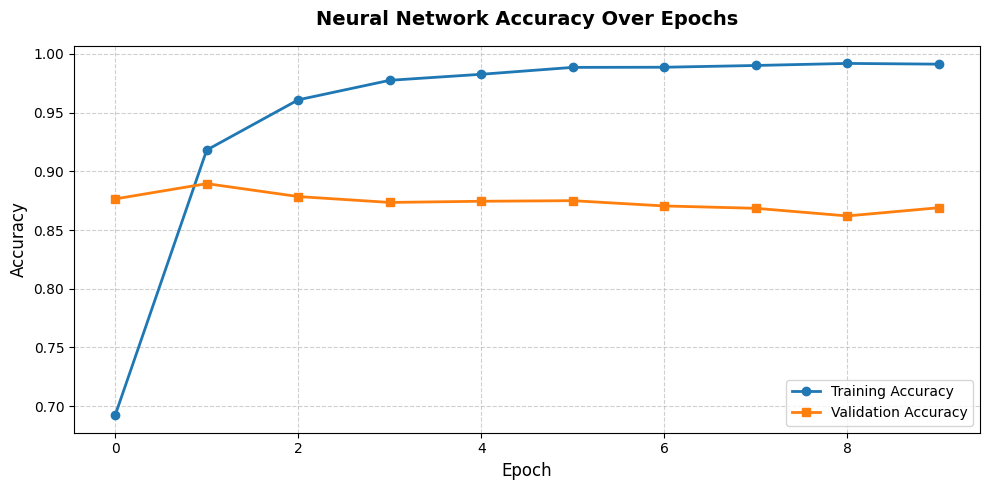

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(10, 5))

# Accuracy subplot
plt.plot(history.history['accuracy'], label='Training Accuracy', color='#1f77b4', linewidth=2, marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#ff7f0e', linewidth=2, marker='s')

# Title and labels
plt.title('Neural Network Accuracy Over Epochs', fontsize=14, weight='bold', pad=15)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Customize ticks and grid
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend with custom location
plt.legend(loc='lower right', fontsize=10)

# Tight layout and show
plt.tight_layout()
plt.show()


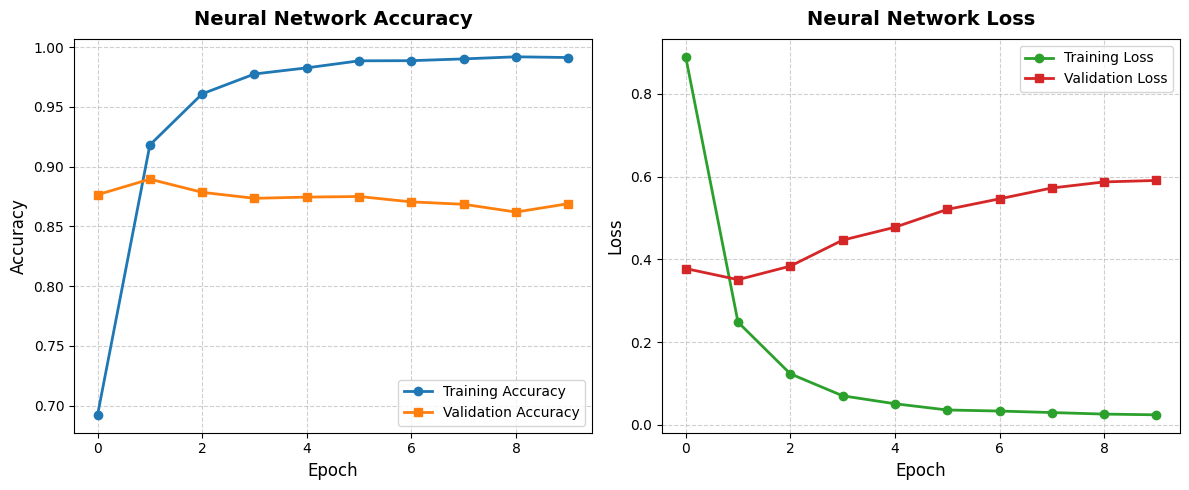

In [22]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 5))

# Subplot 1: Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='#1f77b4', linewidth=2, marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#ff7f0e', linewidth=2, marker='s')
plt.title('Neural Network Accuracy', fontsize=14, weight='bold', pad=10)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Subplot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='#2ca02c', linewidth=2, marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='#d62728', linewidth=2, marker='s')
plt.title('Neural Network Loss', fontsize=14, weight='bold', pad=10)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Tight layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()
